In this notebook, I provide a Data Exploratory Analysis (EDA) for text data from IMDB dataset
from HuggingFace website:

[IMDB](https://huggingface.co/datasets/imdb)

I selected this dataset for several reasons. First, it is a familiar topic for all of us: movies. Second, I
have worked with this dataset in my PhD studies. Third, it is related to the model
I deployed using docker for task 2 (text data).


In [1]:
import pandas as pd
from collections import defaultdict, Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist
import spacy
from textblob import TextBlob


d:\python\sound-of-laughter-main\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('df-train.csv')

It is a good idea to first analyze the basic statistics of our text dataset, like the number of
characters, words, and length of each word.

### Number of characters in each review

<AxesSubplot:>

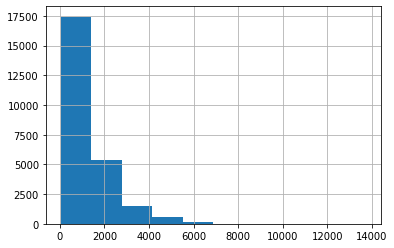

In [3]:
df['text'].str.len().hist()


This histogram shows that the length of movie reviews is generally between 1 and 7000 characters,
with most frequent between 1 and 1500 characters.

### Number of words in each review

<AxesSubplot:>

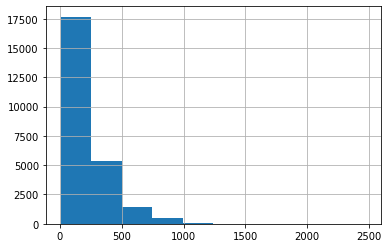

In [4]:
df['text'].str.split().map(lambda x: len(x)).hist()

Also, this diagram shows that the length of reviews is generally between 1 word to 1250 words,
with most frequent between 1 and 250 words. This shows that users tend to provide shorter reviews compared to
longer reviews.

### Average word length

<AxesSubplot:>

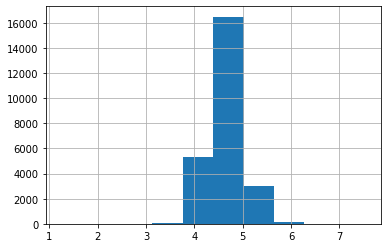

In [5]:
df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

This diagram shows that the average length of words used in reviews is between 3 to 6 characters,
 with 4.75 as the most frequent. This is probably because the rate of stopwords is high in the text data. So,
 it is insightful to analyze the frequency of stopwords and non-stopwords.

([<matplotlib.patches.Wedge at 0x24fd02e5ca0>,
 [Text(0.30649599134393185, 1.056437507517648, 'stop'),
  Text(-0.30649589243311254, -1.0564375362138692, 'non-stop')],
 [Text(0.1671796316421446, 0.5762386404641716, '41.0%'),
  Text(-0.16717957769078864, -0.5762386561166558, '59.0%')])

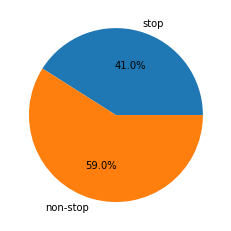

In [6]:
stop=set(stopwords.words('english'))

docs = df['text'].str.split()
docs = docs.values.tolist()
corpus = [word for doc in docs for word in doc]

res = [0, 0]

for word in corpus:
    if word in stop:
        res[0] += 1
    else:
        res[1] += 1

mylabels = ['stop', 'non-stop']
plt.pie(res, labels=mylabels, autopct='%1.1f%%')

As it is seen, 40% of all words is stopword. So, this is the reason that the length
of words in reviews is mostly short.

To have an insight about the most frequent stopwords, let's depict a histogram showing the
10 most frequent stopwords.

## Stop words frequency

<BarContainer object of 10 artists>

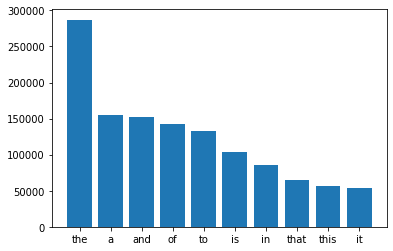

In [7]:
dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

## Non-stop words frequency
Also, depicting the most frequent non-stopwords gives a clue about the general
topic of our dataset.

<BarContainer object of 10 artists>

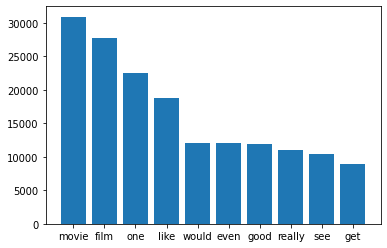

In [10]:
temp = [word.lower() for doc in docs for word in doc if word.isalnum()]
non_stop_corpus = [word for word in temp if word not in stop]


counter = Counter(non_stop_corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:10]:
    if word not in stop:
        x.append(word)
        y.append(count)

plt.bar(x,y)

## Word Cloud
Wordcloud is a useful library in Python to effectively represent text data.
Every font size and color is proportional to word importance and frequency. Using wordcloud
provides a good way to have a quick insight about the topic of our corpus and data.

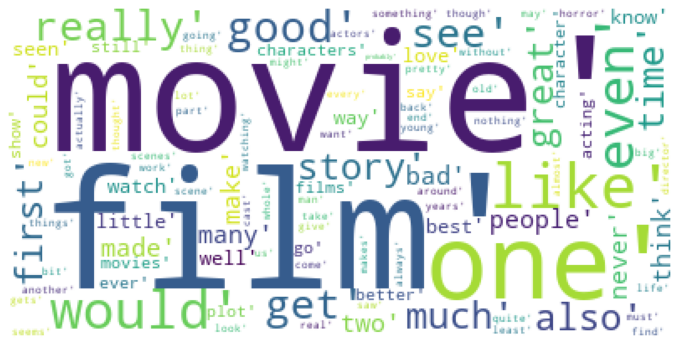

In [11]:
mostcommon = FreqDist(non_stop_corpus).most_common(100)

wordcloud = WordCloud(background_color='white', stopwords=set(STOPWORDS))

wordcloud = wordcloud.generate(str(mostcommon))

fig = plt.figure(figsize=(12, 10))
plt.axis('off')

plt.imshow(wordcloud)


## Distribution of ratings

We have two classes in our training dataset: positive and negative. Exploring the distribution
of each class shows how balanced our dataset is. Following graph shows that our data is completely balanced.

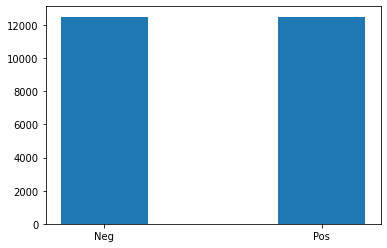

In [12]:
r0 = (df['label'] == 0).sum()
r1 = (df['label'] == 1).sum()

classes = [r0, r1]
label = ['Neg', 'Pos']

plt.bar(label, classes, width=0.4)

## Sentiment Analysis

Sentiment analysis is very important in today's marketing, as it provides insight
about the sentiment of users and we can understand how our customers feel about our products and
how we can boost our products to have a better user satisfaction in the long term.

Textblob provides an easy way to perform sentiment analysis on our text data.


<AxesSubplot:>

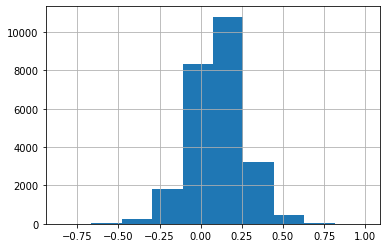

In [13]:

def polarity(text):
    return TextBlob(text).sentiment.polarity

polarity_score = df['text'].apply(lambda x : polarity(x))
polarity_score.hist()


As it is clear from this diagram, the polarity lies mainly between -0.1 and 0.25, which indicates that the
majority of user reviews are neutral.


## Named Entity Recognition
We can use ```Spacy``` library for NER. Since I don't have a strong GPU, I limit the NER search to
first 2000 reviews. This library provides several entity types, from which I show the result for
work_of_art, person, and GPE (locations).

d:\python\sound-of-laughter-main\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


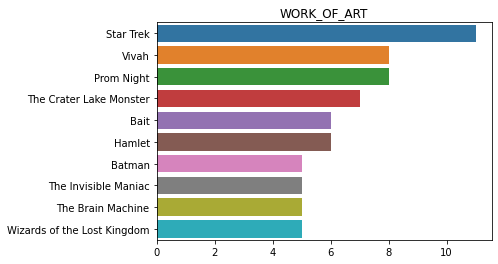

d:\python\sound-of-laughter-main\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


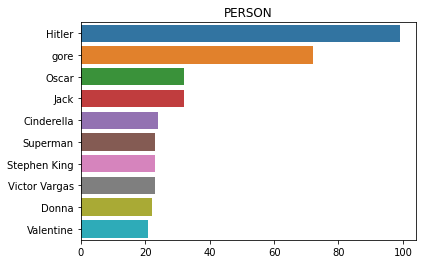

d:\python\sound-of-laughter-main\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


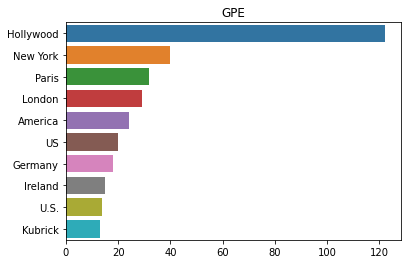

In [14]:
model = spacy.load("en_core_web_sm")
df1 = df.iloc[:2000]

def plot_ner(text, ent):

    def get_ner(text, ent):
        doc = model(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered = df1['text'].apply(lambda x: get_ner(x, ent))
    entity_filtered = [i for x in entity_filtered for i in x]
    counter = Counter(entity_filtered)
    x, y = map(list, zip(*counter.most_common(10)))
    sns.barplot(y, x).set_title(ent)
    plt.show()

plot_ner(df1, 'WORK_OF_ART')
plot_ner(df1, 'PERSON')
plot_ner(df1, 'GPE')